In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_trf

In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")
from spacy.pipeline import EntityRuler

In [ ]:
patterns = [
    {"label": "ORG", "pattern": "Microsoft"},
    {"label": "PERSON", "pattern": "Satya Nadella"},
    {"label": "PRODUCT", "pattern": "Azure"},
    {"label": "PRODUCT", "pattern": "Windows"},
    {"label": "PRODUCT", "pattern": "Copilot"},

    {"label": "ORG", "pattern": "OpenAI"},
    {"label": "PERSON", "pattern": "Sam Altman"},
    {"label": "PRODUCT", "pattern": "ChatGPT"},
    {"label": "PRODUCT", "pattern": "GPT-4"},
    {"label": "PRODUCT", "pattern": "GPT-3.5"},

    {"label": "ORG", "pattern": "Apple"},
    {"label": "PERSON", "pattern": "Tim Cook"},
    {"label": "PRODUCT", "pattern": "iPhone"},
    {"label": "PRODUCT", "pattern": "iOS"},
    {"label": "PRODUCT", "pattern": "MacBook"},

    {"label": "ORG", "pattern": "Meta"},
    {"label": "PERSON", "pattern": "Mark Zuckerberg"},
    {"label": "PRODUCT", "pattern": "Llama"},

    {"label": "ORG", "pattern": "Tesla"},
    {"label": "PERSON", "pattern": "Elon Musk"},
    {"label": "PRODUCT", "pattern": "Tesla Autopilot"},
    {"label": "PRODUCT", "pattern": "Cybertruck"},

    {"label": "ORG", "pattern": "Anthropic"},
    {"label": "PRODUCT", "pattern": "Claude"},

    {"label": "ORG", "pattern": "Google"},
    {"label": "PERSON", "pattern": "Sundar Pichai"},
    {"label": "PRODUCT", "pattern": "Gemini"},
    {"label": "PRODUCT", "pattern": "Bard"},

    {"label": "ORG", "pattern": "Amazon"},
    {"label": "PERSON", "pattern": "Andy Jassy"},
    {"label": "PRODUCT", "pattern": "Alexa"},

    {"label": "ORG", "pattern": "Nvidia"},
    {"label": "PERSON", "pattern": "Jensen Huang"},
    {"label": "PRODUCT", "pattern": "Blackwell"},
    {"label": "PRODUCT", "pattern": "H100"},

    {"label": "ORG", "pattern": "DeepSeek"},
    {"label": "ORG", "pattern": "xAI"},
    {"label": "ORG", "pattern": "Stability AI"},
    {"label": "ORG", "pattern": "Mistral AI"},

]

In [ ]:
ruler = nlp.add_pipe("entity_ruler", before="ner")
ruler.add_patterns(patterns)

In [ ]:
from collections import defaultdict
import pandas as pd
import re
import numpy as np

In [ ]:
from tqdm import tqdm

def extract_entities_by_type(text, max_length=1000):
    if not isinstance(text, str) or not text.strip():
        return [], [], [], []
    text = text[:max_length]
    doc = nlp(text)
    orgs = [ent.text.strip() for ent in doc.ents if ent.label_ == "ORG"]
    persons = [ent.text.strip() for ent in doc.ents if ent.label_ == "PERSON"]
    products = [ent.text.strip() for ent in doc.ents if ent.label_ == "PRODUCT"]
    gpes = [ent.text.strip() for ent in doc.ents if ent.label_ == "GPE"]
    return orgs, persons, products, gpes

def batch_entity_extraction(df, text_column="text_clean", batch_size=500):
    orgs_all, persons_all, products_all, gpes_all = [], [], [], []

    for i in tqdm(range(0, len(df), batch_size)):
        batch = df.iloc[i:i+batch_size]
        for text in batch[text_column]:
            orgs, persons, products, gpes = extract_entities_by_type(text)
            orgs_all.append(orgs)
            persons_all.append(persons)
            products_all.append(products)
            gpes_all.append(gpes)

    return orgs_all, persons_all, products_all, gpes_all


In [ ]:
df_ai = pd.read_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data.csv')
df_ai.shape

(181299, 9)

In [ ]:
df_ai.head()

,url,date,title_clean,text_clean,topic,industry,Representation,sentiment,sentiment_score
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321
1,https://allafrica.com/stories/202504250184.html,2025-04-25,Africa AI Policies in Africa - Lessons From Gh...,Africa AI Policies in Africa - Lessons From Gh...,93,Employment & Workforce,"['biontech', 'intellitek', 'founded', 'streaml...",positive,0.953480
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,Yang Lan interviews academics on AI development,a link to a friend (Opens in new window)Click ...,261,Technology,"['office', 'ordered', 'holiday', 'highlighted'...",positive,0.863181
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,Commerce Nominee Promises Increased Domestic A...,"Details By Andrew Rice Feb 3, 2025 4 14 pm Com...",52,Government & Policy,"['biden', 'order', 'executive', 'safeguards', ...",positive,0.887693
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,Revolutionizing the Manufacturing Industry The...,Revolutionizing the Manufacturing Industry The...,5,Employment & Workforce,"['usd', 'cagr', 'growth', 'projected', 'techna...",positive,0.960287


In [ ]:
sample_data = df_ai.sample(100)

In [ ]:
# sample_data[["ORG", "PERSON", "PRODUCT", "GPE"]] = sample_data["text_clean"].apply(
#     lambda x: pd.Series(extract_entities_by_type(x)))

In [ ]:
orgs, persons, products, gpes = batch_entity_extraction(df_ai)

df_ai["orgs"] = orgs
df_ai["people"] = persons
df_ai["products"] = products
df_ai["locations"] = gpes

 98%|█████████▊| 355/363 [10:12:40<13:46, 103.30s/it]

In [ ]:
df_ai.head()

,url,date,title_clean,text_clean,topic,industry,Representation,sentiment,sentiment_score,orgs,people,products,locations
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321,"[Infogain, Microsoft, Courtyard by Marriott, G...","[Dibyendu Bhattacharya, Sonu Sood s, Anubhav S...","[Azure, Azure, Azure, Azure, Azure, Azure]","[Los Gatos, California]"
1,https://allafrica.com/stories/202504250184.html,2025-04-25,Africa AI Policies in Africa - Lessons From Gh...,Africa AI Policies in Africa - Lessons From Gh...,93,Employment & Workforce,"['biontech', 'intellitek', 'founded', 'streaml...",positive,0.953480,[AllAfrica],"[My Account, My Account, Thompson Gyedu Kwarkye]",[],"[Ghana, Rwanda, Ghana, Rwanda, Johannesburg, A..."
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,Yang Lan interviews academics on AI development,a link to a friend (Opens in new window)Click ...,261,Technology,"['office', 'ordered', 'holiday', 'highlighted'...",positive,0.863181,"[Asia Times, ISIS, the Institute for AI Indust...","[Yuval Noah Harari, Yang Lan, Hun Manet, Yuval...",[ChatGPT],"[US, China, China]"
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,Commerce Nominee Promises Increased Domestic A...,"Details By Andrew Rice Feb 3, 2025 4 14 pm Com...",52,Government & Policy,"['biden', 'order', 'executive', 'safeguards', ...",positive,0.887693,"[Commerce, the Department of Commerce, the Com...","[Andrew Rice, Howard Lutnick, Donald Trump, Lu...",[],"[America, America, America]"
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,Revolutionizing the Manufacturing Industry The...,Revolutionizing the Manufacturing Industry The...,5,Employment & Workforce,"['usd', 'cagr', 'growth', 'projected', 'techna...",positive,0.960287,[],"[Hla, tauj Xov]",[],[Lub neej]


In [ ]:
df_ai.shape

(181299, 13)

In [ ]:
df_ai.to_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data_with_entities.csv', index=False)

In [2]:
import pandas as pd
import re
import string
import ast

In [2]:
df_ai = pd.read_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data_with_entities_lastest.csv')

In [4]:
df_ai.drop(columns='Unnamed: 0', inplace=True)
df_ai.head()

,url,date,title_clean,text_clean,topic,industry,Representation,sentiment,sentiment_score,orgs,people,products,locations
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321,"['Infogain', 'Microsoft', 'Courtyard by Marrio...","['Dibyendu Bhattacharya', 'Sonu Sood s', 'Anub...","['Azure', 'Azure', 'Azure', 'Azure', 'Azure', ...","['Los Gatos', 'California']"
1,https://allafrica.com/stories/202504250184.html,2025-04-25,Africa AI Policies in Africa - Lessons From Gh...,Africa AI Policies in Africa - Lessons From Gh...,93,Employment & Workforce,"['biontech', 'intellitek', 'founded', 'streaml...",positive,0.953480,['AllAfrica'],"['My Account', 'My Account', 'Thompson Gyedu K...",[],"['Ghana', 'Rwanda', 'Ghana', 'Rwanda', 'Johann..."
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,Yang Lan interviews academics on AI development,a link to a friend (Opens in new window)Click ...,261,Technology,"['office', 'ordered', 'holiday', 'highlighted'...",positive,0.863181,"['Asia Times', 'ISIS', 'the Institute for AI I...","['Yuval Noah Harari', 'Yang Lan', 'Hun Manet',...",['ChatGPT'],"['US', 'China', 'China']"
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,Commerce Nominee Promises Increased Domestic A...,"Details By Andrew Rice Feb 3, 2025 4 14 pm Com...",52,Government & Policy,"['biden', 'order', 'executive', 'safeguards', ...",positive,0.887693,"['Commerce', 'the Department of Commerce', 'th...","['Andrew Rice', 'Howard Lutnick', 'Donald Trum...",[],"['America', 'America', 'America']"
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,Revolutionizing the Manufacturing Industry The...,Revolutionizing the Manufacturing Industry The...,5,Finance & Stock Markets,"['usd', 'cagr', 'growth', 'projected', 'techna...",positive,0.960287,[],"['Hla', 'tauj Xov']",[],['Lub neej']


In [6]:

def normalize_entities_auto(entities):
    normalized = []
    for entity in entities:
        # Lowercase
        entity = entity.lower()
        # Remove punctuation
        entity = re.sub(f"[{re.escape(string.punctuation)}]", "", entity)
        normalized.append(entity)
    return list(set(normalized))  # optional: remove duplicates per article

In [11]:
df_ai['orgs'] = df_ai['orgs'].apply(ast.literal_eval)
df_ai['normalized_orgs'] = df_ai['orgs'].apply(normalize_entities_auto)

In [13]:
df_ai[['normalized_orgs','orgs']].sample(10)

,normalized_orgs,orgs
79667,[google],[Google]
70654,"[richemont, penske business media llc, penske ...","[Penske Business Media, LLC, Penske Media Corp..."
57219,"[lisk machine learning, klaytn, polkadot, inte...","[Lisk Machine Learning, Lisk Machine Learning,..."
2008,"[kinderhook industries, centerskycam, pelicans...","[CarolinaCommunity, CenterSkycam, ProsSportsHi..."
90352,"[techcrunch, openai, duolingo, the world econo...","[Duolingo, TechCrunch, TechCrunch, Duolingo, D..."
135768,"[dakota news nowcareers, ghd digital]","[Dakota News NowCareers, GHD Digital, GHD Digi..."
47125,"[bureaupowernationpress, insurtech, releasesmo...","[NewsWTOC, BureauPowerNationPress, ReleasesMot..."
115855,"[city council, board of directors, npr news, k...","[City Council, Kenai Peninsula Borough Assembl..."
12356,"[house of lords, the lords communications and ...","[House of Lords, The Lords Communications and ..."
45113,"[afp, forbes, bbc news]","[Forbes, Forbes, BBC News, AFP]"


In [3]:
df_ai = pd.read_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data_with_entities_normalized.csv')

In [4]:
df_ai.head()

,url,date,title_clean,text_clean,topic,industry,Representation,sentiment,sentiment_score,orgs,people,products,locations,normalized_orgs,normalized_people,normalized_products,normalized_locations
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321,"['Infogain', 'Microsoft', 'Courtyard by Marrio...","['Dibyendu Bhattacharya', 'Sonu Sood s', 'Anub...","['Azure', 'Azure', 'Azure', 'Azure', 'Azure', ...","['Los Gatos', 'California']","['courtyard by marriott', 'renewable energy', ...","['subroto sen', 'nandakumar jairam', 'anubhav ...",['azure'],"['california', 'los gatos']"
1,https://allafrica.com/stories/202504250184.html,2025-04-25,Africa AI Policies in Africa - Lessons From Gh...,Africa AI Policies in Africa - Lessons From Gh...,93,Employment & Workforce,"['biontech', 'intellitek', 'founded', 'streaml...",positive,0.953480,['AllAfrica'],"['My Account', 'My Account', 'Thompson Gyedu K...",[],"['Ghana', 'Rwanda', 'Ghana', 'Rwanda', 'Johann...",['allafrica'],"['my account', 'thompson gyedu kwarkye']",[],"['rwanda', 'south africa', 'kenya', 'ghana', '..."
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,Yang Lan interviews academics on AI development,a link to a friend (Opens in new window)Click ...,261,Technology,"['office', 'ordered', 'holiday', 'highlighted'...",positive,0.863181,"['Asia Times', 'ISIS', 'the Institute for AI I...","['Yuval Noah Harari', 'Yang Lan', 'Hun Manet',...",['ChatGPT'],"['US', 'China', 'China']","['asia times', 'the institute for ai industry ...","['yuval noah harari', 'john hennessy', 'hun ma...",['chatgpt'],"['us', 'china']"
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,Commerce Nominee Promises Increased Domestic A...,"Details By Andrew Rice Feb 3, 2025 4 14 pm Com...",52,Government & Policy,"['biden', 'order', 'executive', 'safeguards', ...",positive,0.887693,"['Commerce', 'the Department of Commerce', 'th...","['Andrew Rice', 'Howard Lutnick', 'Donald Trum...",[],"['America', 'America', 'America']",['the committee of commerce science and transp...,"['lutnick', 'andrew rice', 'donald trump', 'ho...",[],['america']
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,Revolutionizing the Manufacturing Industry The...,Revolutionizing the Manufacturing Industry The...,5,Finance & Stock Markets,"['usd', 'cagr', 'growth', 'projected', 'techna...",positive,0.960287,[],"['Hla', 'tauj Xov']",[],['Lub neej'],[],"['hla', 'tauj xov']",[],['lub neej']


In [6]:
df_ai['normalized_locations'] = df_ai['normalized_locations'].apply(ast.literal_eval)
df_ai['normalized_people'] = df_ai['normalized_people'].apply(ast.literal_eval)
df_ai['normalized_products'] = df_ai['normalized_products'].apply(ast.literal_eval)
df_ai['normalized_orgs'] = df_ai['normalized_orgs'].apply(ast.literal_eval)

In [7]:

# Explode for aggregation
exploded_df = df_ai.explode('normalized_orgs')

# Group by entity and sentiment
sentiment_summary = (
    exploded_df.groupby('normalized_orgs')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary['total'] = sentiment_summary.sum(axis=1)
sentiment_summary['positive_ratio'] = (
    sentiment_summary.get('positive', 0) / sentiment_summary['total']
)

# Optional: sort and view
sentiment_summary = sentiment_summary.sort_values(by='total', ascending=False)
print(sentiment_summary.head(10))

sentiment        negative  positive  total  positive_ratio
normalized_orgs                                           
openai               3844     15886  19730        0.805170
google               3397     14619  18016        0.811445
microsoft            2055     11395  13450        0.847212
apple                2262      8295  10557        0.785735
nvidia                449      5390   5839        0.923103
amazon               1152      4434   5586        0.793770
meta                  631      4129   4760        0.867437
facebook             1682      2647   4329        0.611458
linkedin             1554      2409   3963        0.607873
youtube              1832      1919   3751        0.511597


In [9]:
sentiment_summary = sentiment_summary.reset_index()
sentiment_summary.head()

sentiment,normalized_orgs,negative,positive,total,positive_ratio
0,openai,3844,15886,19730,0.805170
1,google,3397,14619,18016,0.811445
2,microsoft,2055,11395,13450,0.847212
3,apple,2262,8295,10557,0.785735
4,nvidia,449,5390,5839,0.923103


In [13]:
num_art = df_ai['url'].nunique()
num_art

181299

In [14]:
sentiment_summary['proportion'] = round(sentiment_summary['total'] / num_art,4)

In [15]:
sentiment_summary

sentiment,normalized_orgs,negative,positive,total,positive_ratio,proportion
0,openai,3844,15886,19730,0.805170,0.1088
1,google,3397,14619,18016,0.811445,0.0994
2,microsoft,2055,11395,13450,0.847212,0.0742
3,apple,2262,8295,10557,0.785735,0.0582
4,nvidia,449,5390,5839,0.923103,0.0322
...,...,...,...,...,...,...
133338,zydio ai,0,1,1,1.000000,0.0000
133339,zydus pharmaceuticals,0,1,1,1.000000,0.0000
133340,zymplify,0,1,1,1.000000,0.0000
133341,zymplify limited,0,1,1,1.000000,0.0000


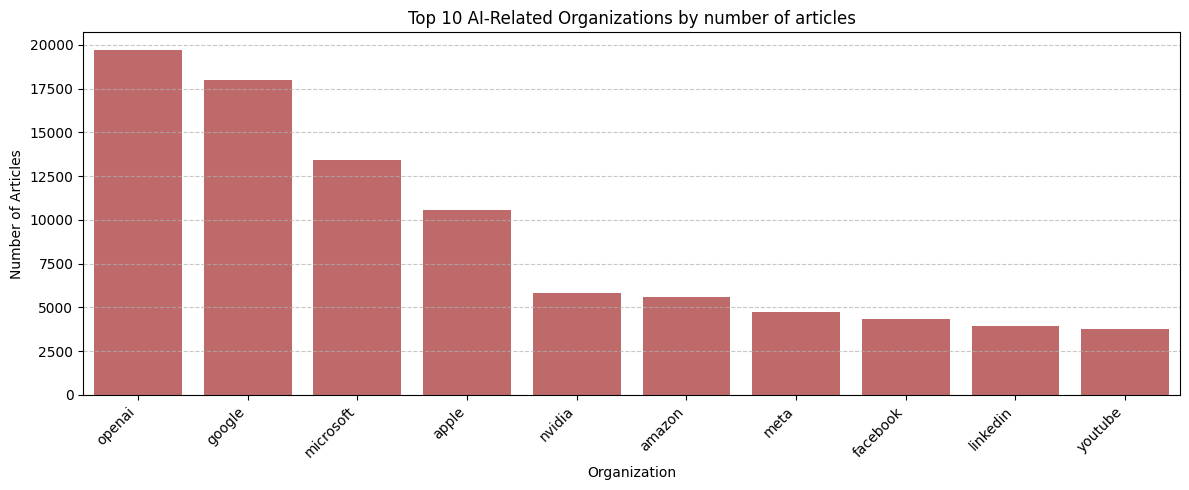

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_sum = sentiment_summary.head(10)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=plot_sum['normalized_orgs'], y=plot_sum['total'],color='indianred')
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 AI-Related Organizations by number of articles")
plt.ylabel("Number of Articles")
plt.xlabel("Organization")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
pd.set_option('display.max_colwidth', 150)
exploded_df.loc[exploded_df['normalized_orgs'] == 'npr',['title_clean','text_clean','orgs','normalized_products']].sample(10)

,title_clean,text_clean,orgs,normalized_products
148342,TechTonic Justice's Kevin De Liban discusses how AI can cause problems in government,Short Features Heritage Month Series Podcasts Syndicated Shorts Program Committee Guidelines for Commentaries on KVNF Gunnison Tunnel Series Music...,"['Program Committee', 'KVNF', 'KVNF', 'KVNF', 'NPR', 'KVNF', 'KVNF', 'KVNF', 'NPR', 'KVNF', 'KVNF', 'KVNF', 'NPR News', 'KVNF', 'KVNF', 'NPR News'...",[]
4134,Fake beauty queens charm judges at the Miss AI pageant,Sound of Ideas The View from Pluto Ideastream News Quiz NPR News The City Club Forum Akron Roundtable The State of Ohio Today From The Ohio Newsro...,"['NPR News', 'The City Club Forum', 'The State of Ohio', 'The Statehouse News Bureau', 'Sound of Us', 'WCLV', 'WCLV', 'The Cleveland Orchestra', '...",[wviz]
109487,Where did U.S. humanities grants go? To projects from a baseball film to AI research,News Featured Articles NPR National News Ohio News Weather The Business Journal Featured Articles NPR National News Ohio News Weather The Business...,"['NPR', 'The Business Journal', 'NPR', 'WYSU', 'WYSU', 'WYSU', 'WYSU', 'WYSU', 'WYSU', 'YSU', 'YSU', 'WYSU', 'WYSU', 'WYSU', 'WYSU', 'WYSU', 'WYSU...",[]
39695,"'New York Times' sues ChatGPT creator OpenAI, Microsoft, for copyright infringement Marfa Public Radio, radio for a wide range.",News News Schedule By Topic Local Government Education Environment Health Science Arts Culture Noticias en Espa ol News Schedule By Topic Local Go...,"['Marfa Public Radio', 'Marfa Public Radio', 'Marfa Public Radio', 'Marfa for Beginners', 'Marfa Public Radio', 'NPR', 'Marfa for Beginners', 'Mar...",[]
152417,Research finds how AI will impact demographics differently,News Special Coverage Arkansas Legislative Session 2025 Local Weather Emergencies Live Special Coverage NPR Newscasts News by Region Local Regiona...,"['NPR', 'NPR', 'KASU', 'KASU News', 'NPR', 'NPR', 'KASU News', 'KASU', 'KASU', 'A-State Morning Edition', 'KASU', 'KASU', 'KASU', 'KASU']",[]
139673,Enhance! HORNK! Artificial intelligence can now ID individual geese,News Culture WMUK News WMUK Culture It Happens Here Why's That? Art Beat WMU News News Archive WMUK News WMUK Culture It Happens Here Why's That? ...,"['WMU News', 'WMUK News', 'WMU News', 'The Pure Drop', 'The Pure Drop', 'WMUK', 'WMUK', 'WMUK', 'NPR', 'WMUK', 'NPR One', 'Western Michigan Univer...",[]
142776,Tell us how AI could (or already is) changing your job,"89.1 WBOI is operating at reduced power while our engineers install a new transmitter. This affects the HD broadcasts as well, on both channel 1 a...","['89.1 WBOI', 'NPR News', 'Getty ImagesThe', 'National Public Radio', 'NPR', 'NPR', 'NPR']",[]
70080,Memorializing loved ones through AI,UWF Board of Trustees Events Upcoming Events Event Submission Form Upcoming Events Event Submission Form News Weather FPREN Get the Florida Storms...,"['UWF Board of Trustees', 'NPR News', 'NPR Program', 'NPR News', 'NPR Program', 'WUWF', 'WUWF', 'WUWF', 'WUWF', 'WUWF', 'WUWF', 'WUWF', 'WUWF', 'N...",[]
81931,X s chatbot can now generate AI images. A lack of guardrails raises election concerns,", has produced depictions that appear to show ballot drop boxes being stuffed and of Vice President Kamala Harris and former President Donald Trum...","['NPR', 'Twitter', 'the OSET Institute', 'NPR']",[]
95131,Q A OpenAI on rival DeepSeek and partnering with the government,News All KBIA News Missouri News Network Missouri News Health Wealth Desk Agriculture Environment Desk Substance Use Recovery Side Effects Public ...,"['KBIA', 'Missouri News Network', 'Missouri News', 'Agriculture Environment Desk', 'NPR', 'Missouri News Network', 'Missouri News', 'Agriculture E...",[]


In [19]:
df_ai['people'] = df_ai['people'].apply(ast.literal_eval)
df_ai['normalized_people'] = df_ai['people'].apply(normalize_entities_auto)
df_ai[['normalized_people','people']].sample(10)

,normalized_people,people
41723,[],[]
58112,"[tuesdayjefferson, john haltermanmr]","[John HaltermanMr, TuesdayJefferson]"
115356,"[reporttahawwur ranapbks, elon musk, shubham a...","[Elon Musk, ReportTahawwur RanaPBKS, Elon Musk..."
175085,[],[]
52462,[the mother lodes],[The Mother Lode's]
132360,"[bret taylor, adam d angelo, dean dougn, larry...","[Sam Altman, Sam Altman, Dean Dougn, Sam Altma..."
6738,[thomas ladd],[Thomas Ladd]
126019,[],[]
158000,[],[]
177834,[cameron hendrix],[Cameron Hendrix]


In [20]:
df_ai['products'] = df_ai['products'].apply(ast.literal_eval)
df_ai['normalized_products'] = df_ai['products'].apply(normalize_entities_auto)
df_ai[['normalized_products','products']].sample(10)

,normalized_products,products
17937,[],[]
178692,[],[]
153294,"[4, roku plus, qled, sling tv, roborock s8 pro...","[Sling TV, QLED, Sonos, Sonos Era 100, Sonos E..."
97017,[],[]
116804,"[chatgpt, experiences]","[Experiences, ChatGPT]"
27890,"[the artificial intelligence virtua, proof of ...","[Lightchain AI, Proof of Intelligence, the Art..."
170649,[chatgpt],[ChatGPT]
10240,[],[]
18333,[],[]
98260,[],[]


In [21]:
df_ai['locations'] = df_ai['locations'].apply(ast.literal_eval)
df_ai['normalized_locations'] = df_ai['locations'].apply(normalize_entities_auto)
df_ai[['normalized_locations','locations']].sample(10)

,normalized_locations,locations
169767,[],[]
157044,[nigeria],[Nigeria]
15326,"[san jose, golden state, san francisco]","[San Francisco, San Francisco, San Jose, Golde..."
170952,"[us, brazil, arkansas, belgium, algeria, bulga...","[U.S., U.S., U.S., U.S., U.S., U.S., Afghanist..."
112584,[],[]
52790,[brazil],[Brazil]
116405,[las vegas],"[Las Vegas, Las Vegas]"
129673,[],[]
154636,"[california, san francisco]","[California, San Francisco, San Francisco]"
151960,[],[]


In [22]:
df_ai.to_csv('/content/drive/MyDrive/UChicago/NLP/labeled_ai_data_with_entities_normalized.csv', index=False)

In [28]:
exploded_df

,url,date,title_clean,text_clean,topic,industry,Representation,sentiment,sentiment_score,orgs,people,products,locations,normalized_orgs,normalized_people,normalized_products,normalized_locations
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321,"[Infogain, Microsoft, Courtyard by Marriott, G...","[Dibyendu Bhattacharya, Sonu Sood s, Anubhav S...","[Azure, Azure, Azure, Azure, Azure, Azure]","[Los Gatos, California]","[courtyard by marriott, renewable energy, hmel...",subroto sen,[azure],"[california, los gatos]"
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321,"[Infogain, Microsoft, Courtyard by Marriott, G...","[Dibyendu Bhattacharya, Sonu Sood s, Anubhav S...","[Azure, Azure, Azure, Azure, Azure, Azure]","[Los Gatos, California]","[courtyard by marriott, renewable energy, hmel...",nandakumar jairam,[azure],"[california, los gatos]"
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321,"[Infogain, Microsoft, Courtyard by Marriott, G...","[Dibyendu Bhattacharya, Sonu Sood s, Anubhav S...","[Azure, Azure, Azure, Azure, Azure, Azure]","[Los Gatos, California]","[courtyard by marriott, renewable energy, hmel...",anubhav sinha s,[azure],"[california, los gatos]"
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321,"[Infogain, Microsoft, Courtyard by Marriott, G...","[Dibyendu Bhattacharya, Sonu Sood s, Anubhav S...","[Azure, Azure, Azure, Azure, Azure, Azure]","[Los Gatos, California]","[courtyard by marriott, renewable energy, hmel...",dibyendu bhattacharya,[azure],"[california, los gatos]"
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...,53,Business & Startups,"['small', 'entrepreneurs', 'unlocking', 'ango'...",positive,0.968321,"[Infogain, Microsoft, Courtyard by Marriott, G...","[Dibyendu Bhattacharya, Sonu Sood s, Anubhav S...","[Azure, Azure, Azure, Azure, Azure, Azure]","[Los Gatos, California]","[courtyard by marriott, renewable energy, hmel...",sonu sood s,[azure],"[california, los gatos]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181296,https://www.zawya.com/en/press-release/compani...,2024-04-15,SentinelOne to spotlight Purple AI at GISEC 2024,WORLDMiddle EastAfricaIndian Sub-continentChin...,29,Cybersecurity,"['cybersecurity', 'widens', 'splunk', 'mixmode...",positive,0.915061,[UAEUAE Realty MarketThe],[],[],"[Ukraine, ENGLISHUAE, ENGLISHKSA]",[uaeuae realty marketthe],NaN,[],"[englishuae, englishksa, ukraine]"
181297,https://www.zawya.com/en/press-release/governm...,2024-06-13,DGHR and DCAI join forces to support the world...,WORLDMiddle EastAfricaIndian Sub-continentChin...,278,Technology,"['bangdb', 'supercomputers', 'fuel', 'training...",positive,0.875749,[UAEUAE Realty MarketThe],[],[],"[Ukraine, ENGLISHUAE, ENGLISHKSA]",[uaeuae realty marketthe],NaN,[],"[englishuae, englishksa, ukraine]"
181298,https://zeenews.india.com/technology/samsung-g...,2024-09-29,Samsung Galaxy S24 FE Launched In India With A...,Samsung Galaxy S24 FE Launched In India With A...,12,Technology,"['oppo', 'smartphone', 'oneplus', 'hohem', 'fo...",positive,0.909869,"[Samsung, Samsung, Samsung, Samsun

In [39]:
exploded_df = df_ai.explode('normalized_people')

# Group by entity and sentiment
sentiment_summary_people = (
    exploded_df.groupby('normalized_people')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary_people['total'] = sentiment_summary_people.sum(axis=1)
sentiment_summary_people['positive_ratio'] = (
    sentiment_summary_people.get('positive', 0) / sentiment_summary_people['total']
)

# Optional: sort and view
sentiment_summary_people = sentiment_summary_people.sort_values(by='total', ascending=False)
print(sentiment_summary_people.head(20))

sentiment                 negative  positive  total  positive_ratio
normalized_people                                                  
sam altman                    1107      3125   4232        0.738422
elon musk                     1239      1991   3230        0.616409
trump                         1284      1139   2423        0.470078
biden                          822      1372   2194        0.625342
phil mackintosh                109      1963   2072        0.947394
altman                         533      1428   1961        0.728200
musk                           622      1036   1658        0.624849
donald trump                   637       673   1310        0.513740
joe biden                      340       856   1196        0.715719
satya nadella                  109       715    824        0.867718
sundar pichai                  111       630    741        0.850202
greta van susterencircle         0       738    738        1.000000
mark zuckerberg                114       578    

In [40]:
sentiment_summary_people.reset_index(inplace=True)
sentiment_summary_people.head(10)

sentiment,normalized_people,negative,positive,total,positive_ratio
0,sam altman,1107,3125,4232,0.738422
1,elon musk,1239,1991,3230,0.616409
2,trump,1284,1139,2423,0.470078
3,biden,822,1372,2194,0.625342
4,phil mackintosh,109,1963,2072,0.947394
5,altman,533,1428,1961,0.728200
6,musk,622,1036,1658,0.624849
7,donald trump,637,673,1310,0.513740
8,joe biden,340,856,1196,0.715719
9,satya nadella,109,715,824,0.867718


In [44]:
combine_map = {
    'sam altman': 'sam altman',
    'altman': 'sam altman',
    'elon musk': 'elon musk',
    'musk': 'elon musk',
    'trump': 'donald trump',
    'donald trump': 'donald trump',
    'biden': 'joe biden',
    'joe biden': 'joe biden',
    'phil mackintosh': 'phil mackintosh',
    'satya nadella': 'satya nadella'
}
sentiment_summary_people['people'] = sentiment_summary_people['normalized_people'].map(combine_map).fillna(sentiment_summary_people['normalized_people'])
summary_people = sentiment_summary_people.groupby('people')[['negative', 'positive']].sum().reset_index()
summary_people['total'] = summary_people['negative'] + summary_people['positive']
summary_people['positive_ratio'] = summary_people['positive'] / summary_people['total']
summary_people = summary_people.sort_values(by='total', ascending=False).reset_index(drop=True)

summary_people

sentiment,people,negative,positive,total,positive_ratio
0,sam altman,1640,4553,6193,0.735185
1,elon musk,1861,3027,4888,0.619272
2,donald trump,1921,1812,3733,0.485400
3,joe biden,1162,2228,3390,0.657227
4,phil mackintosh,109,1963,2072,0.947394
...,...,...,...,...,...
99322,ivanovets,0,1,1,1.000000
99323,ive ddc,0,1,1,1.000000
99324,ivo vlaev,0,1,1,1.000000
99325,ivan rabbiosi,0,1,1,1.000000


In [45]:
summary_people.head(20)

sentiment,people,negative,positive,total,positive_ratio
0,sam altman,1640,4553,6193,0.735185
1,elon musk,1861,3027,4888,0.619272
2,donald trump,1921,1812,3733,0.485400
3,joe biden,1162,2228,3390,0.657227
4,phil mackintosh,109,1963,2072,0.947394
5,satya nadella,109,715,824,0.867718
6,sundar pichai,111,630,741,0.850202
7,greta van susterencircle,0,738,738,1.000000
8,mark zuckerberg,114,578,692,0.835260
9,modi,121,480,601,0.798669


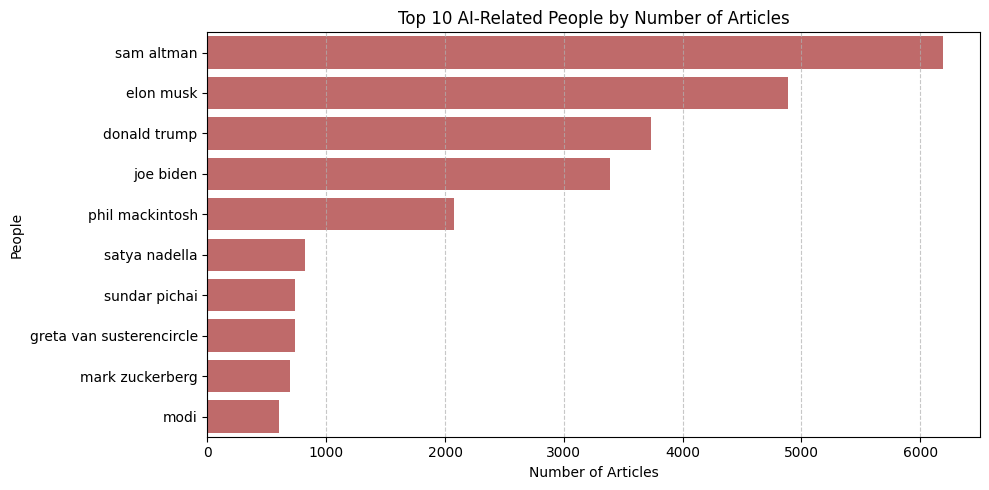

In [46]:
# sentiment_summary_people.reset_index(inplace=True)
plot_sum = summary_people.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=plot_sum['people'], x=plot_sum['total'], color='indianred')
plt.yticks(rotation=0)
plt.title("Top 10 AI-Related People by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("People")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
exploded_df = df_ai.explode('normalized_products')

# Group by entity and sentiment
sentiment_summary_product = (
    exploded_df.groupby('normalized_products')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary_product['total'] = sentiment_summary_product.sum(axis=1)
sentiment_summary_product['positive_ratio'] = (
    sentiment_summary_product.get('positive', 0) / sentiment_summary_product['total']
)

# Optional: sort and view
sentiment_summary_product = sentiment_summary_product.sort_values(by='total', ascending=False)
print(sentiment_summary_product.head(20))

sentiment            negative  positive  total  positive_ratio
normalized_products                                           
chatgpt                  5543     18728  24271        0.771620
iphone                    968      2477   3445        0.719013
bard                      664      2157   2821        0.764622
windows                   628      2189   2817        0.777068
gemini                    407      1893   2300        0.823043
gpt4                      222      1971   2193        0.898769
copilot                   189      1991   2180        0.913303
ios                       387      1771   2158        0.820667
azure                      49      1260   1309        0.962567
claude                    409       798   1207        0.661143
alexa                     414       687   1101        0.623978
generative ai              15      1018   1033        0.985479
android                   182       743    925        0.803243
dalle                     134       661    795        0

In [54]:
sentiment_summary_product = sentiment_summary_product.reset_index()
sentiment_summary_product.head(10)

sentiment,normalized_products,negative,positive,total,positive_ratio
0,chatgpt,5543,18728,24271,0.771620
1,iphone,968,2477,3445,0.719013
2,bard,664,2157,2821,0.764622
3,windows,628,2189,2817,0.777068
4,gemini,407,1893,2300,0.823043
5,gpt4,222,1971,2193,0.898769
6,copilot,189,1991,2180,0.913303
7,ios,387,1771,2158,0.820667
8,azure,49,1260,1309,0.962567
9,claude,409,798,1207,0.661143


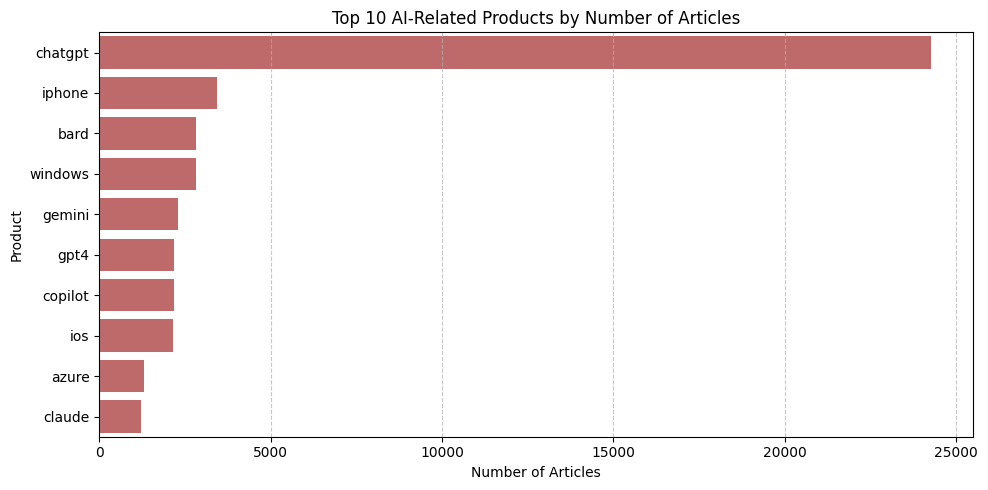

In [55]:
plot_sum = sentiment_summary_product.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=plot_sum['normalized_products'], x=plot_sum['total'], color='indianred')
plt.yticks(rotation=0)
plt.title("Top 10 AI-Related Products by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Product")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
exploded_df = df_ai.explode('normalized_locations')

# Group by entity and sentiment
sentiment_summary_locations = (
    exploded_df.groupby('normalized_locations')['sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Add total and positive ratio
sentiment_summary_locations['total'] = sentiment_summary_locations.sum(axis=1)
sentiment_summary_locations['positive_ratio'] = (
    sentiment_summary_locations.get('positive', 0) / sentiment_summary_locations['total']
)

# Optional: sort and view
sentiment_summary_locations = sentiment_summary_locations.sort_values(by='total', ascending=False)
print(sentiment_summary_locations.head(20))

sentiment             negative  positive  total  positive_ratio
normalized_locations                                           
us                        7232     22098  29330        0.753427
india                     1702      8422  10124        0.831885
china                     1697      5631   7328        0.768422
bahrain                    318      6893   7211        0.955901
dc                         541      6120   6661        0.918781
algeria                    136      6456   6592        0.979369
uk                        2145      4354   6499        0.669949
australia                  926      5463   6389        0.855063
california                1317      5008   6325        0.791779
new york                  1685      4212   5897        0.714261
calif                      123      4885   5008        0.975439
europe                     831      3876   4707        0.823454
uae                        413      4218   4631        0.910818
arkansas                   487      3939

In [48]:
sentiment_summary_locations.reset_index(inplace=True)
sentiment_summary_locations.head(10)

sentiment,normalized_locations,negative,positive,total,positive_ratio
0,us,7232,22098,29330,0.753427
1,india,1702,8422,10124,0.831885
2,china,1697,5631,7328,0.768422
3,bahrain,318,6893,7211,0.955901
4,dc,541,6120,6661,0.918781
5,algeria,136,6456,6592,0.979369
6,uk,2145,4354,6499,0.669949
7,australia,926,5463,6389,0.855063
8,california,1317,5008,6325,0.791779
9,new york,1685,4212,5897,0.714261


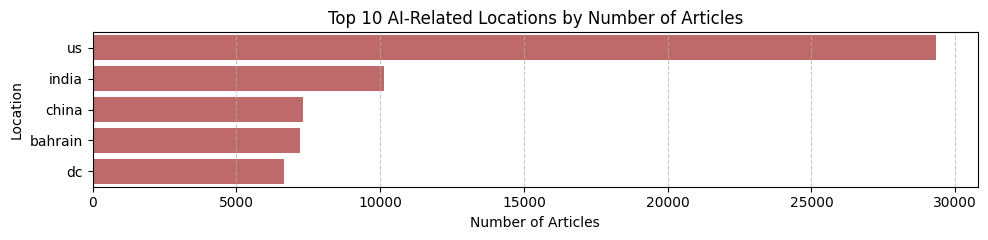

In [52]:
plot_sum = sentiment_summary_locations.head(5)

plt.figure(figsize=(10, 2.5))
sns.barplot(y=plot_sum['normalized_locations'], x=plot_sum['total'], color='indianred')
plt.yticks(rotation=0)
plt.title("Top 10 AI-Related Locations by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Location")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-29-9a91a7c6d028>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])
<ipython-input-29-9a91a7c6d028>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['date'].dt.to_period('M')


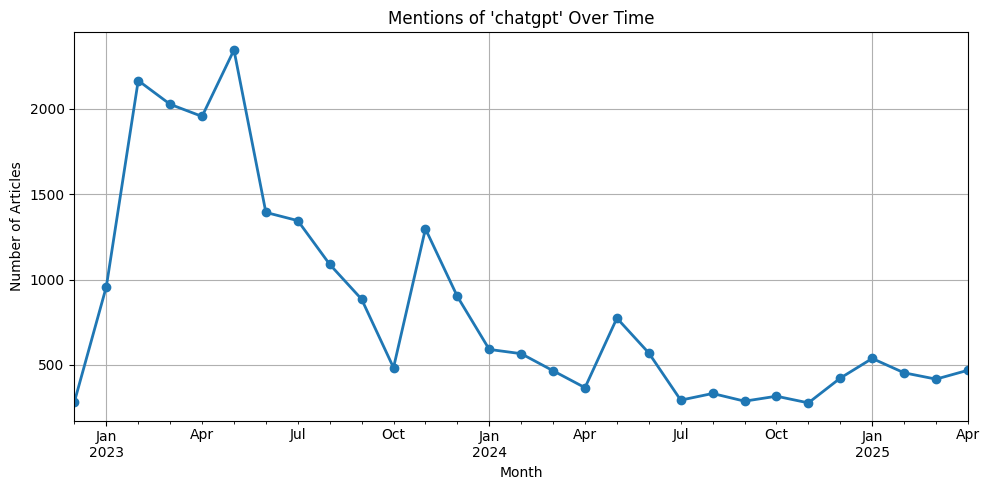

In [29]:
import matplotlib.pyplot as plt
exploded_df = df_ai.explode('normalized_products')
# 1. Filter for a specific product (e.g., 'chatgpt')
product_name = 'chatgpt'
filtered_df = exploded_df[exploded_df['normalized_products'] == product_name]

# 2. Ensure 'date' column is datetime and resample by month
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df['month'] = filtered_df['date'].dt.to_period('M')

# 3. Count mentions per month
monthly_counts = filtered_df.groupby('month').size()

# 4. Plot
plt.figure(figsize=(10, 5))
monthly_counts.plot(marker='o', linewidth=2)
plt.title(f"Mentions of '{product_name}' Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()